In [73]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-performance-dataset/Student_performance_data _.csv


In [74]:


df = pd.read_csv('/kaggle/input/students-performance-dataset/Student_performance_data _.csv') # To read the dataset from the path specified into your 
# dataframe. The dataframe is 


df.head() # Read the first 5 rows from the dataset. Similarly, you can use df.head(10) to return the first 10 rows of the dataframe and so on.
# df.tail() will return the last 5 rows of the dataframe. And you can enter a specific number of rows you want to see. 

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [75]:
df.columns 

Index(['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
       'GradeClass'],
      dtype='object')

### We will first train the model as it is, without any preprocessing and data cleaning, get those results, and then we will tweak the dataset and do some preprocessing and feature engineering to see how much we improve upon the R².

###

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [77]:
X = df.drop('GPA',axis=1)
y=df['GPA']

In [78]:
X.head()


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,4.0


In [79]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 42)
# This will split the dataset into 80,20... 80 for the training and 20 for the testing. 

In [80]:
scaler  = StandardScaler()
X_train_scaled = scaler .fit_transform(X_train)
X_test_scaled = scaler .transform(X_test)

In [81]:
poly = PolynomialFeatures(degree = 2, include_bias = False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

In [82]:
model = LinearRegression()
model.fit(X_train_poly,y_train)


LinearRegression()

In [83]:
y_pred = model.predict(X_test_poly)

In [84]:
print(f"R² Score:{r2_score(y_test,y_pred):.4f}")
print(f"Mean Absolute Error:{mean_absolute_error(y_test,y_pred):.4f}")
print(f"Root Mean Squared Error:{np.sqrt(mean_squared_error(y_test,y_pred)):.4f}")

R² Score:0.9598
Mean Absolute Error:0.1441
Root Mean Squared Error:0.1824


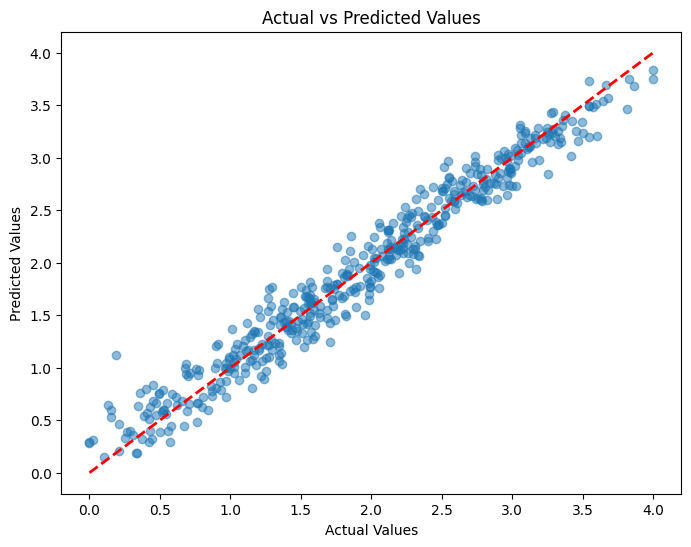

In [85]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

### We saw the results we got from simply training a linear Regression Model over the dataset.Now, we will do some preprocessing and see if R² is getting better.  ###

## Let's Analyze the data ##

<Axes: xlabel='Gender', ylabel='count'>

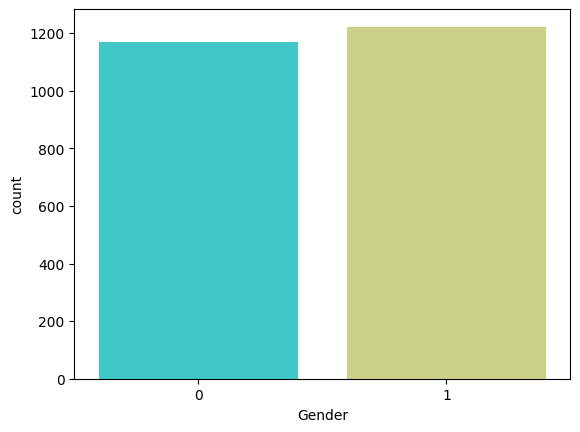

In [86]:
import seaborn as sns
sns.countplot(x='Gender',data=df,palette='rainbow')

In [87]:
df.nunique()

StudentID            2392
Age                     4
Gender                  2
Ethnicity               4
ParentalEducation       5
StudyTimeWeekly      2392
Absences               30
Tutoring                2
ParentalSupport         5
Extracurricular         2
Sports                  2
Music                   2
Volunteering            2
GPA                  2371
GradeClass              5
dtype: int64

In [88]:

df.isnull().sum() # So there are no null values for us to remove. Good

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [89]:
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [90]:
df = df.drop('StudentID',axis=1) # I removed the StudentID coz it's of no use in the training. 
# 

In [91]:
df.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


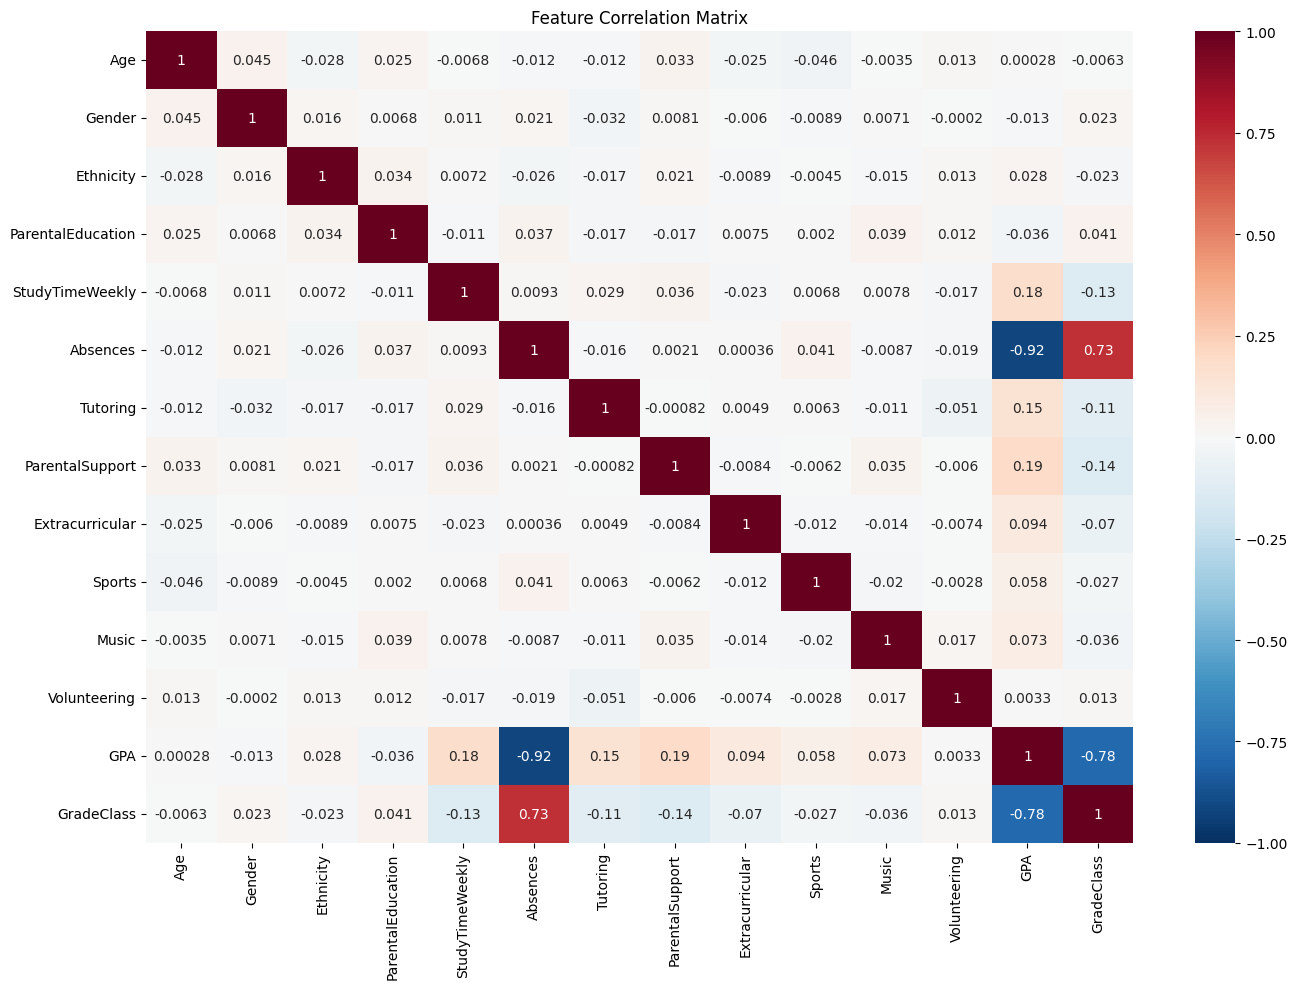

In [92]:
correlation_matrix = df.corr()

# Create a large figure to see all values clearly
plt.figure(figsize=(14, 10))

# Plot a heatmap of the correlations
sns.heatmap(correlation_matrix,
            annot=True,   # Show the correlation values in the cells
            cmap='RdBu_r', # Use a diverging colormap (red for negative, blue for positive)
            center=0,     # Center the colormap at 0
            vmin=-1, vmax=1) # Set the scale from -1 to 1
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

## Both of these columns were massive red flags, due to their higher corelation we had to remove them ##

In [93]:
df.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [94]:


# 2. Define your features (X) and target (y)
X = df.drop('GPA', axis=1) # All columns except GPA
y = df['GPA']              # The target column

# 3. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Initialize and Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 5. Make predictions on the test set
y_pred = model.predict(X_test)

# 6. Evaluate the Model's Performance
print("Linear Regression Model Evaluation")
print("---------------------------------")
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred):.4f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")

# (Optional) Check the model's coefficients to see feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print("\nFeature Importance (Coefficients):")
print(feature_importance.sort_values(by='Coefficient', key=abs, ascending=False))

Linear Regression Model Evaluation
---------------------------------
R² Score: 0.9568
Mean Absolute Error (MAE): 0.1506
Root Mean Squared Error (RMSE): 0.1889

Feature Importance (Coefficients):
              Feature  Coefficient
6            Tutoring     0.241743
8     Extracurricular     0.177854
9              Sports     0.177085
10              Music     0.146632
7     ParentalSupport     0.139241
5            Absences    -0.093031
12         GradeClass    -0.061217
4     StudyTimeWeekly     0.027332
1              Gender     0.013051
0                 Age    -0.005749
2           Ethnicity     0.003512
3   ParentalEducation     0.001174
11       Volunteering     0.000193


In [96]:
# Import additional libraries for Polynomial Regression

from sklearn.linear_model import Ridge # Better for polynomial models

# 1. Split the data (same as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Scale the features (IMPORTANT for polynomial regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Create polynomial features (e.g., degree=2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# 4. Initialize and Train the model (Using Ridge to prevent overfitting)
model = Ridge(alpha=1.0, random_state=42)
model.fit(X_train_poly, y_train)

# 5. Make predictions and evaluate
y_pred = model.predict(X_test_poly)

print("Polynomial Regression (Degree=2) Model Evaluation")
print("-------------------------------------------------")
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred):.4f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")

Polynomial Regression (Degree=2) Model Evaluation
-------------------------------------------------
R² Score: 0.9578
Mean Absolute Error (MAE): 0.1466
Root Mean Squared Error (RMSE): 0.1868


In [98]:
data = {
    'Metric': ['R² Score', 'MAE', 'RMSE'],
    'Linear Regression': [0.9568, 0.1506, 0.1889],
    'Polynomial Regression (deg=2)': [0.9578, 0.1466, 0.1868],
    'Winner & Interpretation': ['Polynomial', 'Polynomial', 'Polynomial'],
    
}

# Convert the dictionary to a DataFrame
df = pd.DataFrame(data)
df.head()



,Metric,Linear Regression,Polynomial Regression (deg=2),Winner & Interpretation
0,R² Score,0.9568,0.9578,Polynomial
1,MAE,0.1506,0.1466,Polynomial
2,RMSE,0.1889,0.1868,Polynomial


### Analysis & Conclusion
The Polynomial Model is Better: The polynomial regression model outperforms the simple linear model on all three evaluation metrics. It has a slightly higher R² and lower error scores (MAE and RMSE).

### The Difference is Small: 
The improvement, while consistent, is very minor (+0.001 in R², -0.004 in MAE). This tells us two important things:

The relationship between your features and GPA is predominantly linear. The simple linear model was already capturing most of the patterns very effectively.

The polynomial model found some subtle non-linear relationships and interaction effects between the features (e.g., maybe the effect of Tutoring is stronger at higher levels of ParentalSupport), which gave it a small edge.

### No Significant Overfitting: 
The fact that the polynomial model's performance on the test set is better (not worse) than the linear model is a great sign. It means the added complexity (squared terms, interaction terms) is meaningful and not just fitting the noise in the training data.